In [89]:
#Importamos las librerias correspondientes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings 
from sklearn.metrics import davies_bouldin_score, homogeneity_completeness_v_measure, adjusted_rand_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
warnings.filterwarnings('ignore')

In [7]:
#cargamos los datos y realizamos visualización de estos
datos=pd.read_csv('Mall_Customers.csv')
print (data.head(10))
print("Info datos")
print(datos.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72
Info datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 


In [8]:
print("Estadistica descriptiva")
print(datos.describe())

Estadistica de descripción
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [46]:
#Verificación de datos faltantes
print("Valores faltantes por columna:")
print(datos.isnull().sum())
data.dropna(inplace=True)

Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


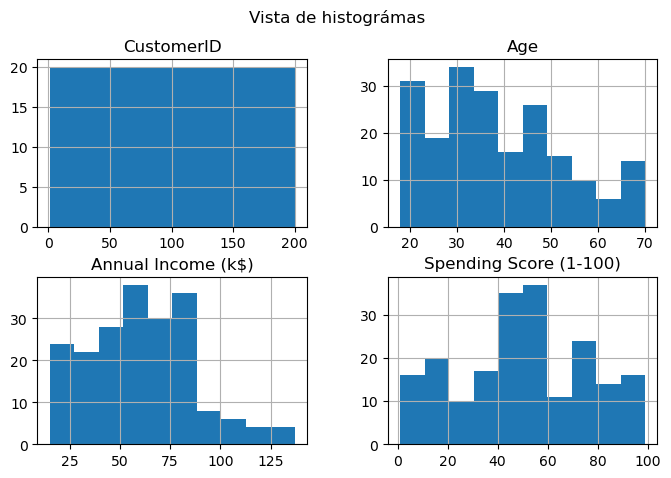

In [38]:
#Vista de histográmas y de BloxPlot
datos.hist(figsize=(8, 5))
plt.suptitle('Vista de histográmas')
plt.show()



In [154]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


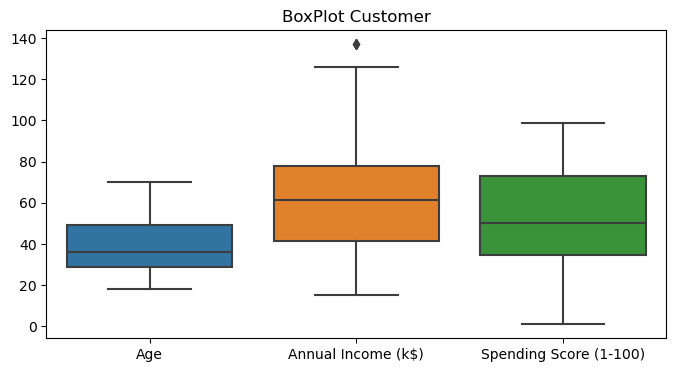

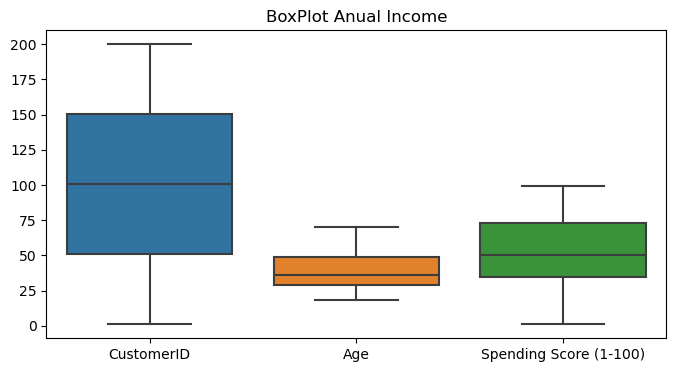

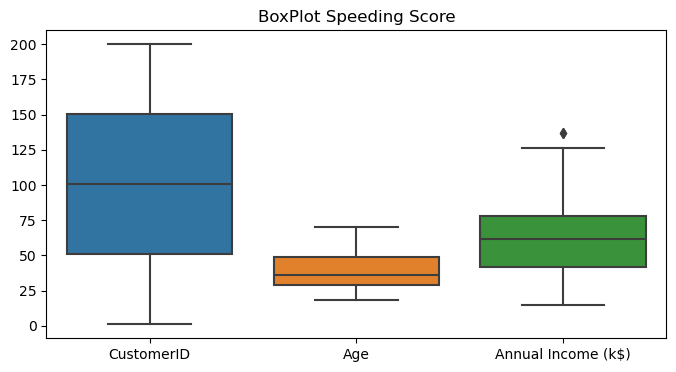

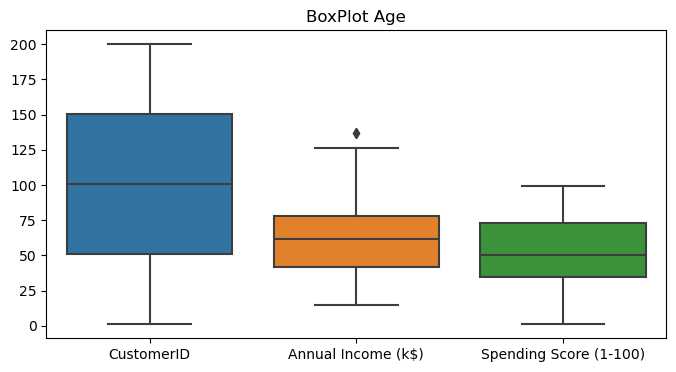

In [41]:
#Boxplots
plt.figure(figsize=(8, 4))
sns.boxplot(data=data.drop(columns=['CustomerID']))
plt.title('BoxPlot Customer')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(data=data.drop(columns=['Annual Income (k$)']))
plt.title('BoxPlot Anual Income')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(data=data.drop(columns=['Spending Score (1-100)']))
plt.title('BoxPlot Speeding Score')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(data=data.drop(columns=['Age']))
plt.title('BoxPlot Age')
plt.show()

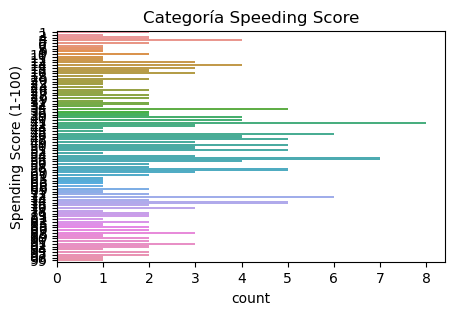

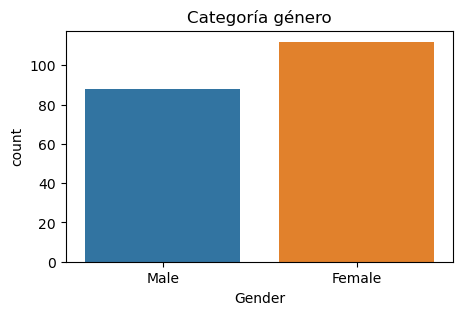

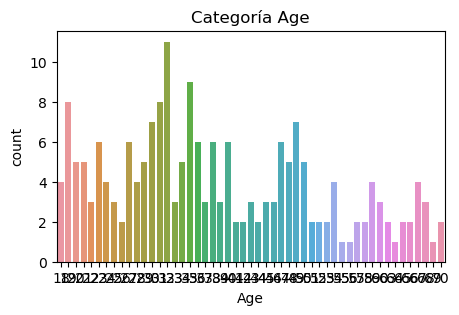

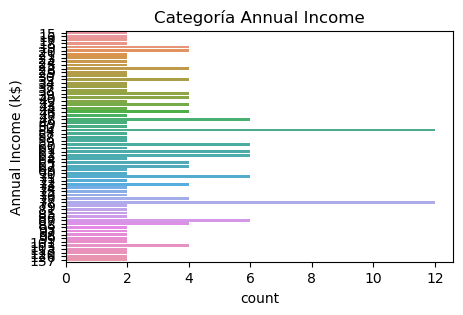

In [37]:
#Visualización variables por categoría
plt.figure(figsize=(5, 3))
sns.countplot(data=data, y='Spending Score (1-100)')
plt.title('Categoría Speeding Score')
plt.show()
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Gender')
plt.title('Categoría género')
plt.show()
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Age')
plt.title('Categoría Age')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, y='Annual Income (k$)')
plt.title('Categoría Annual Income')
plt.show()

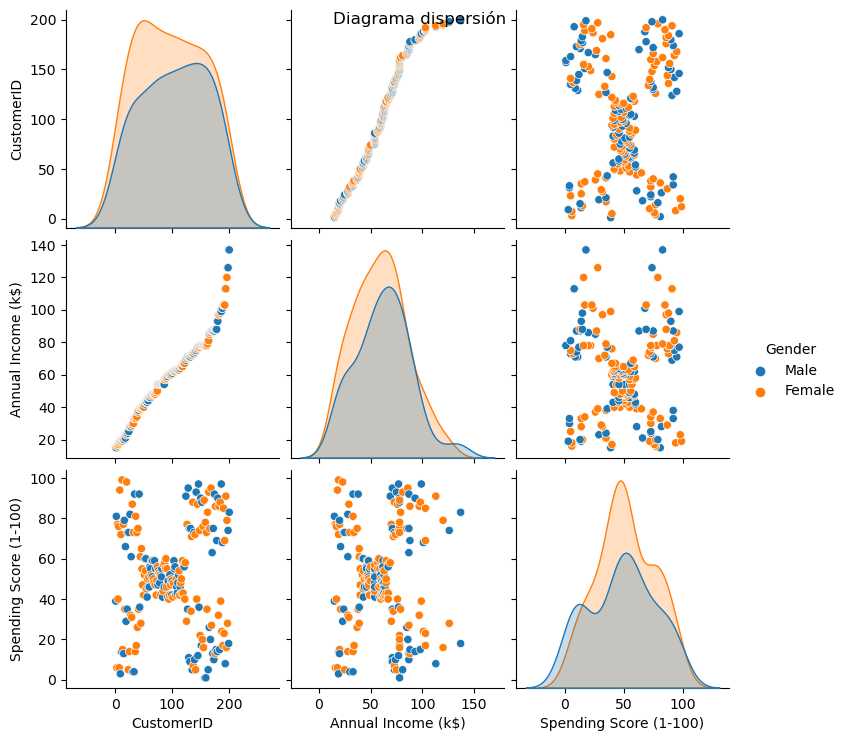

In [44]:
#Visualización de diagramas de dispersión
sns.pairplot(datos.drop(columns=['Age']), diag_kind='kde', hue='Gender')
plt.suptitle('Diagrama dispersión')
plt.show()

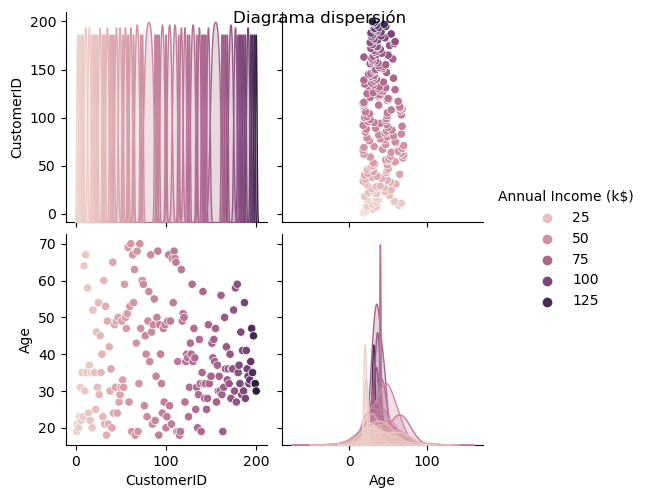

In [45]:
#Visualización de diagramas de dispersión
sns.pairplot(datos.drop(columns=['Spending Score (1-100)']), diag_kind='kde', hue='Annual Income (k$)')
plt.suptitle('Diagrama dispersión')
plt.show()

In [90]:
#Escalamos los datos a numericos, principalmente para los datos de Gender los cuales no lo son:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [107]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

In [109]:
print (data.head(10))


   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       1  0.019231            0.000000                0.387755
1           2       1  0.057692            0.000000                0.816327
2           3       0  0.038462            0.008197                0.051020
3           4       0  0.096154            0.008197                0.775510
4           5       0  0.250000            0.016393                0.397959
5           6       0  0.076923            0.016393                0.765306
6           7       0  0.326923            0.024590                0.051020
7           8       0  0.096154            0.024590                0.948980
8           9       1  0.884615            0.032787                0.020408
9          10       0  0.230769            0.032787                0.724490


In [111]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [112]:
model.fit(data)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [114]:
labels = model.labels_
print (labels) 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [116]:
#Impresión de coeficiente puntuación e indice
silhouette = silhouette_score(data, labels)
print("Coeficiente Silhouette", silhouette)

davies_bouldin = davies_bouldin_score(data, labels)
print("Puntuacion Davies Bouldin", davies_bouldin)

calinski_harabasz = calinski_harabasz_score(data, labels)
print("Índice Calinski Harabasz", calinski_harabasz)

Coeficiente Silhouette 0.5624691242802242
Puntuacion Davies Bouldin 0.5010002233839665
Índice Calinski Harabasz 648.9575023588712


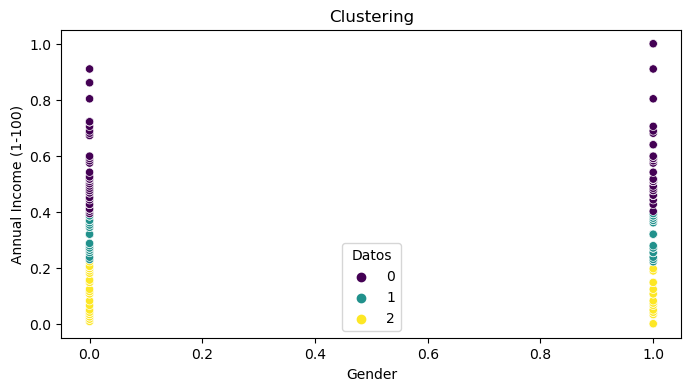

In [124]:
#Gráficos del clustering
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Gender', y='Annual Income (k$)', hue=labels, palette='viridis')
plt.title('Clustering')
plt.xlabel('Gender')
plt.ylabel('Annual Income (1-100)')
plt.legend(title='Datos')
plt.show()

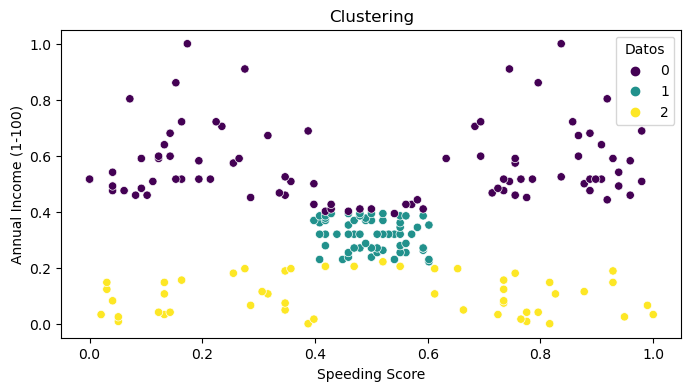

In [123]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Spending Score (1-100)', y='Annual Income (k$)', hue=labels, palette='viridis')
plt.title('Clustering')
plt.xlabel('Speeding Score')
plt.ylabel('Annual Income (1-100)')
plt.legend(title='Datos')
plt.show()

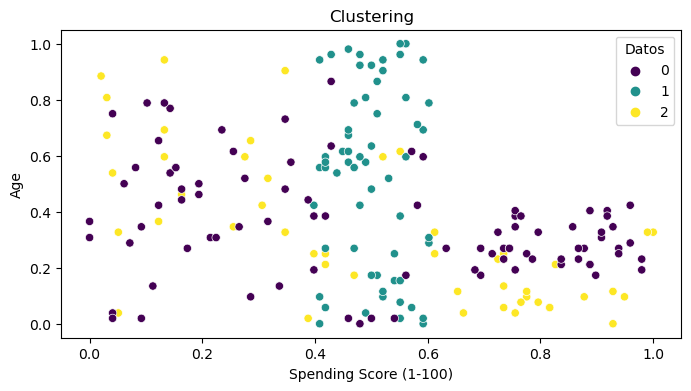

In [128]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Spending Score (1-100)', y='Age', hue=labels, palette='viridis')
plt.title('Clustering')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.legend(title='Datos')
plt.show()

In [157]:
ward_clustering = linkage(datos, method="ward", metric="euclidean")

In [163]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(datos), columns=datos.columns)
print(X)

     CustomerID    Gender       Age  Annual Income (k$)  \
0     -1.723412  1.128152 -1.424569           -1.738999   
1     -1.706091  1.128152 -1.281035           -1.738999   
2     -1.688771 -0.886405 -1.352802           -1.700830   
3     -1.671450 -0.886405 -1.137502           -1.700830   
4     -1.654129 -0.886405 -0.563369           -1.662660   
..          ...       ...       ...                 ...   
195    1.654129 -0.886405 -0.276302            2.268791   
196    1.671450 -0.886405  0.441365            2.497807   
197    1.688771  1.128152 -0.491602            2.497807   
198    1.706091  1.128152 -0.491602            2.917671   
199    1.723412  1.128152 -0.635135            2.917671   

     Spending Score (1-100)  
0                 -0.434801  
1                  1.195704  
2                 -1.715913  
3                  1.040418  
4                 -0.395980  
..                      ...  
195                1.118061  
196               -0.861839  
197                0.

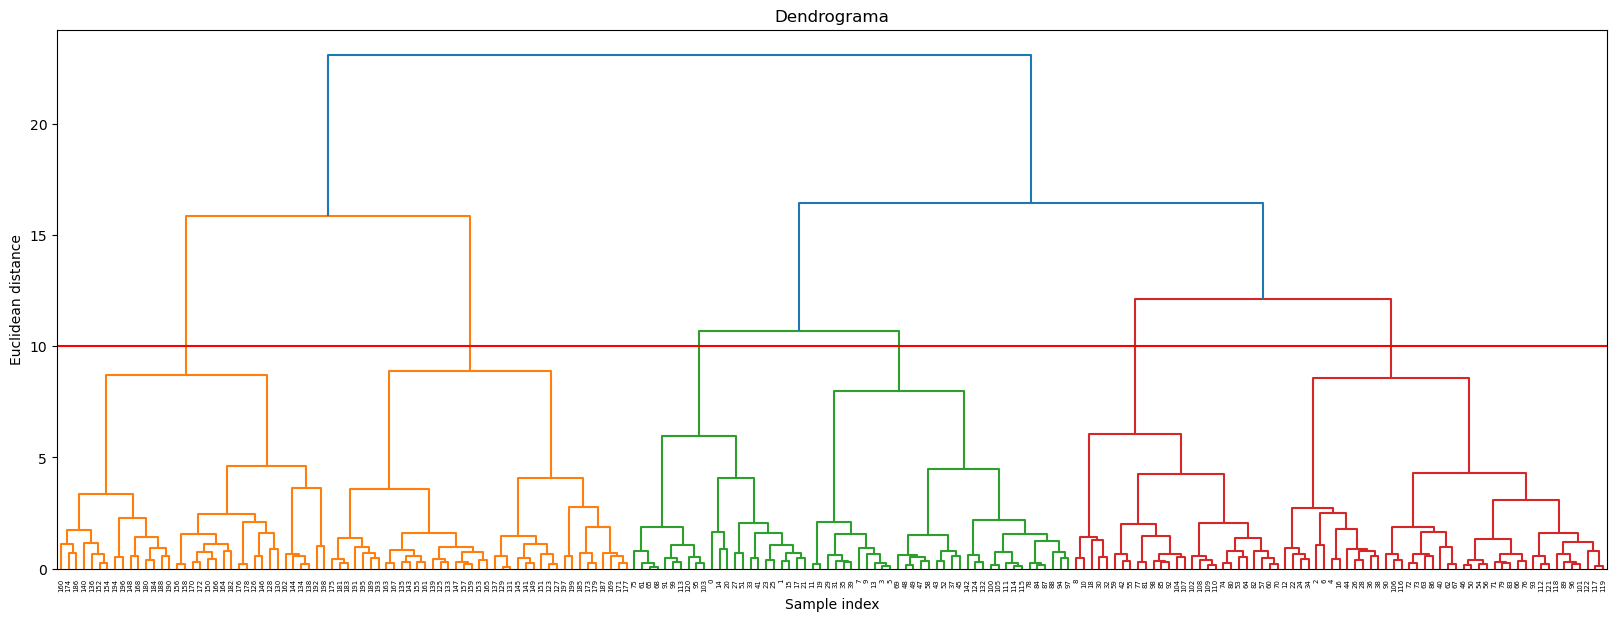

In [164]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#El Grupo 0 representa aproximadamente la mitad de los clientes, con ingresos anuales moderados y puntajes de gasto promedio, ubicándolos en un nivel medio de poder adquisitivo.
#El primer grupo está compuesto por clientes con ingresos bajos y puntajes de gasto bajos, indicando menor poder adquisitivo y tendencia a ser más frugales.
#El grupo 2 comprende clientes con ingresos altos y puntajes de gasto altos, representando a personas con alto poder adquisitivo que gastan libremente.
#El coeficiente de Silhouette de 0.56 indica una buena separación entre los grupos. #La puntuación de Davies-Bouldin de 0.50 sugiere agrupaciones compactas y bien separadas. 
#Además, el índice de Calinski-Harabasz de 648.96 indica grupos bien definidos y separados.
